In [49]:
# ✅ Cell 1: Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


In [51]:
# ✅ Cell 3: Dataset path
base_dir = r'C:\Users\Dell\OneDrive\Desktop\Brain_Tumor_Detection'  # ← Replace with your dataset path


In [52]:
# ✅ Cell 4: Remove pred folder if it exists
import shutil
pred_folder = os.path.join(base_dir, 'pred')
if os.path.exists(pred_folder):
    shutil.rmtree(pred_folder)


In [53]:
# ✅ Cell 5: Image Preprocessing
IMG_SIZE = 150
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data = datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 2550 images belonging to 2 classes.
Found 450 images belonging to 2 classes.


In [54]:
# ✅ Cell 6: Model Architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     5,308,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,328,321 (20.33 MB)

 Trainable params: 5,328,129 (20.33 MB)

 Non-trainable params: 192 (768.00 B)

In [55]:
# ✅ Cell 7: Train on GPU (or CPU fallback)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

with tf.device('/GPU:0' if gpus else '/CPU:0'):
    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=50,
        #callbacks=[early_stop]
    )


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 50s 605ms/step - accuracy: 0.6052 - loss: 4.9074 - val_accuracy: 0.5956 - val_loss: 1.9467
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 50s 619ms/step - accuracy: 0.6079 - loss: 0.6549 - val_accuracy: 0.6200 - val_loss: 3.0609
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 48s 595ms/step - accuracy: 0.6231 - loss: 0.6413 - val_accuracy: 0.5978 - val_loss: 4.3810
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 48s 600ms/step - accuracy: 0.6564 - loss: 0.6043 - val_accuracy: 0.6356 - val_loss: 3.0927
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 48s 604ms/step - accuracy: 0.6290 - loss: 0.5989 - val_accuracy: 0.6222 - val_loss: 2.9078
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 48s 602ms/step - accuracy: 0.7215 - loss: 0.5640 - val_accuracy: 0.6911 - val_loss: 0.7024
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 48s 596ms/step - accuracy: 0.7152 - loss: 0.5425 - val_accuracy: 0.6511 - val_loss: 1.3319
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 48s 596ms/step - accuracy: 0.7124 - loss: 0.6188 - val_accu

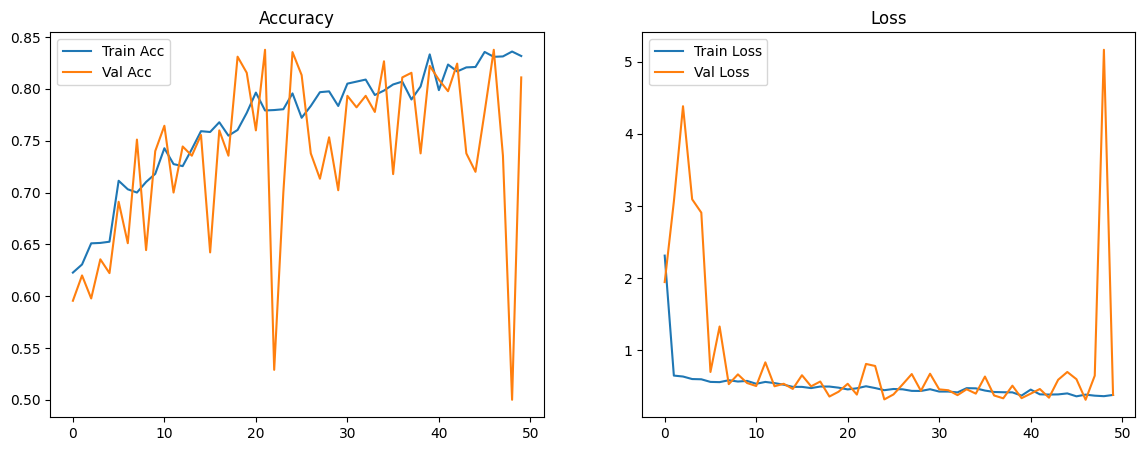

In [56]:
# ✅ Cell 8: Plot results
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()
